<a href="https://colab.research.google.com/github/Sonarajan04/hotel_reservation_ML/blob/main/Project_1_hotelreser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Reservation Dataset

The aim of this project is to predict hotel reservation cancellations using hotel reservation dataset from kaggle.This data analysis involves plotting graphs,trying different machine learning models,EDA and graphs and methods to increase the accuracies to optimize the booking process and reduce future booking cancellations

## Load set of Libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df=pd.read_csv('/content/drive/MyDrive/datasets/Hotel Reservations.csv')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [3]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [4]:
df.shape

(36275, 19)

In [5]:
df.drop_duplicates()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [6]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

### Encoding

In [8]:
le=LabelEncoder()
df['type_of_meal_plan']=le.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved']=le.fit_transform(df['room_type_reserved'])
df['market_segment_type']=le.fit_transform(df['market_segment_type'])
df['booking_status']=le.fit_transform(df['booking_status'])

In [9]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

In [10]:
df['booking_status'].value_counts()

booking_status
1    24390
0    11885
Name: count, dtype: int64

In [11]:
# 1 not cancelled
# 0 booking cancelled

In [12]:
df.drop(['Booking_ID'],axis=1,inplace=True)

In [13]:
X=df.iloc[:,:-1]
X.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0


In [14]:
y=df.iloc[:,-1]
y.head(5)

0    1
1    1
2    0
3    0
4    0
Name: booking_status, dtype: int64

### Scaling

In [15]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.5       , 0.        , 0.14285714, ..., 0.        , 0.12037037,
        0.        ],
       [0.5       , 0.        , 0.28571429, ..., 0.        , 0.19755556,
        0.2       ],
       [0.25      , 0.        , 0.28571429, ..., 0.        , 0.11111111,
        0.        ],
       ...,
       [0.5       , 0.        , 0.28571429, ..., 0.        , 0.1822037 ,
        0.4       ],
       [0.5       , 0.        , 0.        , ..., 0.        , 0.175     ,
        0.        ],
       [0.5       , 0.        , 0.14285714, ..., 0.        , 0.29938889,
        0.        ]])

### Splitting the Data

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

### Model

In [17]:
knn=KNeighborsClassifier()

In [18]:
sv=SVC()

In [19]:
nb=GaussianNB()

In [20]:
dt=DecisionTreeClassifier(criterion='entropy')

In [21]:
rf=RandomForestClassifier(random_state=1)

In [22]:
lst1=[knn,sv,nb,dt,rf]
for i in lst1:
  print('************',i,'************')
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(classification_report(y_test,y_pred))

************ KNeighborsClassifier() ************
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      3522
           1       0.88      0.90      0.89      7361

    accuracy                           0.85     10883
   macro avg       0.83      0.82      0.83     10883
weighted avg       0.85      0.85      0.85     10883

************ SVC() ************
              precision    recall  f1-score   support

           0       0.76      0.65      0.70      3522
           1       0.84      0.90      0.87      7361

    accuracy                           0.82     10883
   macro avg       0.80      0.78      0.79     10883
weighted avg       0.82      0.82      0.82     10883

************ GaussianNB() ************
              precision    recall  f1-score   support

           0       0.36      0.98      0.52      3522
           1       0.95      0.16      0.27      7361

    accuracy                           0.42     10883
   macro

In [23]:
#checking whether the dataset is imbalanced or not

In [24]:
y.value_counts()

booking_status
1    24390
0    11885
Name: count, dtype: int64

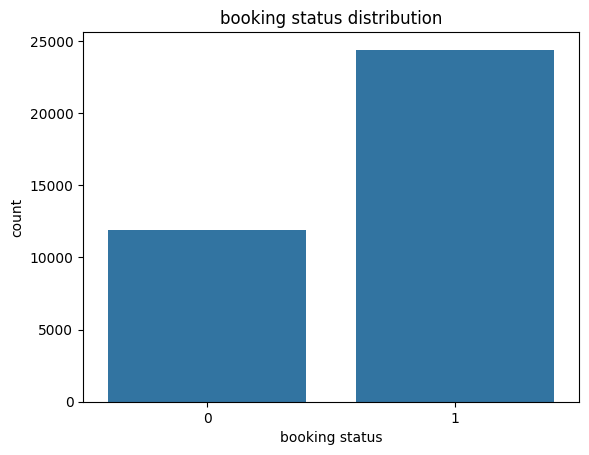

In [25]:
sns.countplot(x='booking_status',data=df)
plt.xlabel('booking status')
plt.ylabel('count')
plt.title('booking status distribution')
plt.show()

### Oversampling

In [26]:
over=SMOTE(random_state=1)
X_os,y_os=over.fit_resample(X_train,y_train)

In [27]:
y_os.value_counts()

booking_status
0    17029
1    17029
Name: count, dtype: int64

In [28]:
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,random_state=1,test_size=0.3)

In [29]:
scaler=MinMaxScaler()
X_train_os=scaler.fit_transform(X_train_os)
X_test_os=scaler.fit_transform(X_test_os)

In [30]:
knn_os=KNeighborsClassifier()
sv_os=SVC()
nb_os=GaussianNB()
dt_os=DecisionTreeClassifier(criterion='entropy',random_state=1)
rf_os=RandomForestClassifier(random_state=1)
lst2=[knn_os,sv_os,nb_os,dt_os,rf_os]
for i in lst2:
  print('************',i,'************')
  i.fit(X_train_os,y_train_os)
  y_pred_os=i.predict(X_test_os)
  print(classification_report(y_test_os,y_pred_os))

************ KNeighborsClassifier() ************
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      5093
           1       0.88      0.81      0.84      5125

    accuracy                           0.85     10218
   macro avg       0.85      0.85      0.85     10218
weighted avg       0.85      0.85      0.85     10218

************ SVC() ************
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      5093
           1       0.86      0.67      0.75      5125

    accuracy                           0.78     10218
   macro avg       0.80      0.78      0.78     10218
weighted avg       0.80      0.78      0.78     10218

************ GaussianNB() ************
              precision    recall  f1-score   support

           0       0.52      0.98      0.68      5093
           1       0.87      0.11      0.19      5125

    accuracy                           0.55     10218
   macro

In [31]:
#randomforest gives the highest accuracy with oversampling

### Recursive Feature Elimination

it is the process of selecting features sequentially,in which features are removed one at a time or a few at a time,iteration after iteration.
it removes the weakest feature until the specified no of features is reached.
n_features_to_select=no of features that will be kept
steps=no of features droped every time

In [32]:
rfe=RFE(estimator=rf_os,n_features_to_select=4,step=2)
rfe.fit(X_train_os,y_train_os)

RFE(estimator=RandomForestClassifier(random_state=1), n_features_to_select=4,
    step=2)

In [33]:
y_pred_rfe=rfe.predict(X_test_os)
print(classification_report(y_test_os,y_pred_rfe))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      5093
           1       0.75      0.65      0.70      5125

    accuracy                           0.72     10218
   macro avg       0.72      0.72      0.71     10218
weighted avg       0.72      0.72      0.71     10218



### principal component analysis

dimensionality reduction


In [34]:
pca=PCA(n_components=6)
X_pc=pca.fit_transform(X_scaled)
X_pc

array([[ 0.88396327, -0.00701651, -0.41726028, -0.06530894, -0.15098328,
        -0.25334944],
       [-0.18533501,  0.84592609, -0.3295202 ,  0.27585816,  0.06250742,
         0.1340598 ],
       [-0.31422431, -0.20473821,  0.42157036, -0.44510879,  0.0066706 ,
        -0.05004867],
       ...,
       [-0.14293531, -0.15534851, -0.50157993,  0.07769873, -0.04912215,
        -0.19197866],
       [-0.43585077,  0.76150423,  0.19897564, -0.23010262,  0.0995037 ,
        -0.0594413 ],
       [ 0.00477809, -0.14450009,  0.41275136,  0.38291164, -0.47796966,
         0.01465882]])

In [35]:
X_train_pc,X_test_pc,y_train_pc,y_test_pc=train_test_split(X_pc,y,test_size=0.3,random_state=1)

In [36]:
knn_pc=KNeighborsClassifier()
sv_pc=SVC()
nb_pc=GaussianNB()
dt_pc=DecisionTreeClassifier(criterion='entropy')
rf_pc=RandomForestClassifier(random_state=1)

In [37]:
lst3=[knn_pc,sv_pc,nb_pc,dt_pc,rf_pc]
for i in lst3:
  print('************',i,'************')
  i.fit(X_train_pc,y_train_pc)
  y_pred_pc=i.predict(X_test_pc)
  print(classification_report(y_test_pc,y_pred_pc))

************ KNeighborsClassifier() ************
              precision    recall  f1-score   support

           0       0.75      0.70      0.73      3522
           1       0.86      0.89      0.87      7361

    accuracy                           0.83     10883
   macro avg       0.81      0.80      0.80     10883
weighted avg       0.83      0.83      0.83     10883

************ SVC() ************
              precision    recall  f1-score   support

           0       0.76      0.45      0.56      3522
           1       0.78      0.93      0.85      7361

    accuracy                           0.77     10883
   macro avg       0.77      0.69      0.71     10883
weighted avg       0.77      0.77      0.76     10883

************ GaussianNB() ************
              precision    recall  f1-score   support

           0       0.54      0.65      0.59      3522
           1       0.81      0.73      0.77      7361

    accuracy                           0.71     10883
   macro

In [38]:
#rfc with pca gives the best accuracy

### Feature Selection using Correlation

correlation refers to the statistical measure that describes the extend to which two variables change together.
1--> the perfect positive corelation.
-1-->the perfect negative corelation
0-->no correlation.correlation is often used to analyze feature relationships and understand how they might impact the performance of a ml model.

In [39]:
df.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.025555,0.011429,0.270348,0.097287,0.076719,0.021841,0.026338,0.314103,-0.192277,-0.047426,-0.119166,0.296886,0.189401,-0.086920
no_of_children,-0.019787,1.000000,0.029478,0.024398,-0.086764,0.034244,0.364073,-0.047091,0.045983,-0.003076,0.025482,0.130618,-0.036348,-0.016390,-0.021189,0.337728,0.124486,-0.033078
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.027327,-0.031111,0.057368,0.046595,0.055357,-0.009894,0.027304,0.129069,-0.067107,-0.020690,-0.026312,-0.004525,0.060593,-0.061563
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.083431,-0.048784,0.094125,0.149650,0.032672,0.037376,-0.009305,0.112952,-0.099764,-0.030080,-0.049344,0.022753,0.045994,-0.092996
type_of_meal_plan,0.025555,-0.086764,-0.027327,-0.083431,1.000000,-0.012991,-0.209176,-0.060271,0.071396,0.008564,0.004833,0.203361,-0.062995,-0.011622,-0.038183,-0.069257,0.022091,-0.026706
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,-0.012991,1.000000,0.038778,-0.066445,0.015684,-0.015505,-0.000037,-0.003723,0.110909,0.027106,0.063810,0.061304,0.087922,0.086185
room_type_reserved,0.270348,0.364073,0.057368,0.094125,-0.209176,0.038778,1.000000,-0.107793,0.103369,-0.005967,0.032919,0.156610,-0.025826,-0.007936,-0.008139,0.469899,0.145041,-0.022986
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.060271,-0.066445,-0.107793,1.000000,0.143439,0.136814,0.006479,-0.006933,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645,-0.438538
arrival_year,0.076719,0.045983,0.055357,0.032672,0.071396,0.015684,0.103369,0.143439,1.000000,-0.339689,0.018849,0.150027,-0.018175,0.003919,0.026422,0.178605,0.053205,-0.179529
arrival_month,0.021841,-0.003076,-0.009894,0.037376,0.008564,-0.015505,-0.005967,0.136814,-0.339689,1.000000,-0.042780,-0.006311,0.000341,-0.038615,-0.010718,0.054423,0.110552,0.011233


<Axes: >

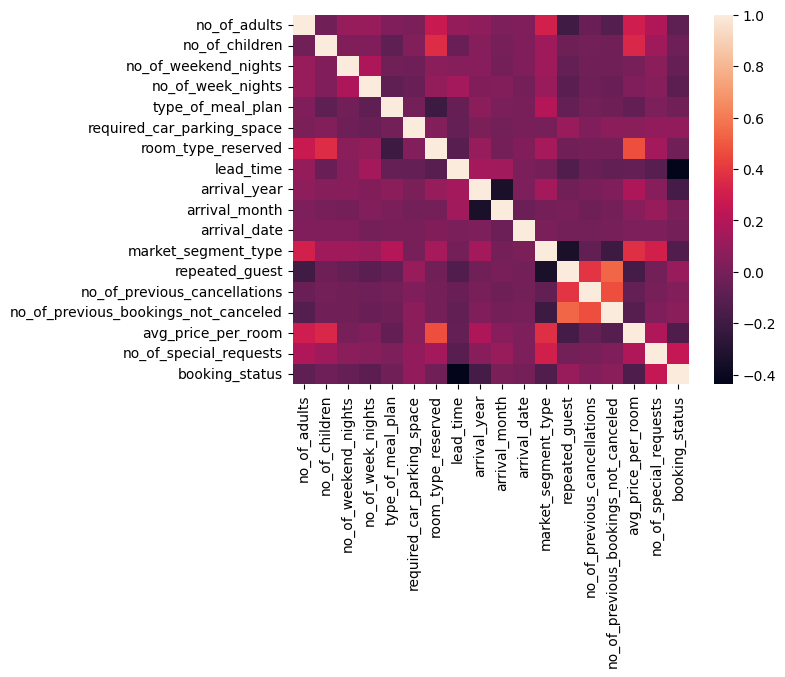

In [40]:
sns.heatmap(df.corr())

In [41]:
#arrival_month,num of previous cancellations,arrival_date,type of mean plan,no_of_adults
#has no corelation with the ouput,so we drop them

In [42]:
X1=df[['arrival_year','no_of_children','required_car_parking_space','no_of_week_nights',
       'no_of_weekend_nights','room_type_reserved','lead_time','market_segment_type','repeated_guest',
       'no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']]
X1.head()

,arrival_year,no_of_children,required_car_parking_space,no_of_week_nights,no_of_weekend_nights,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2017,0,0,2,1,0,224,3,0,0,65.00,0
1,2018,0,0,3,2,0,5,4,0,0,106.68,1
2,2018,0,0,1,2,0,1,4,0,0,60.00,0
3,2018,0,0,2,0,0,211,4,0,0,100.00,0
4,2018,0,0,1,1,0,48,4,0,0,94.50,0


In [43]:
X1.shape

(36275, 12)

### statistical informations

In [44]:
X1.describe()

,arrival_year,no_of_children,required_car_parking_space,no_of_week_nights,no_of_weekend_nights,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,2017.820427,0.105279,0.030986,2.204300,0.810724,0.708890,85.232557,3.552447,0.025637,0.153411,103.423539,0.619655
std,0.383836,0.402648,0.173281,1.410905,0.870644,1.399851,85.930817,0.681536,0.158053,1.754171,35.089424,0.786236
min,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000,1.000000,0.000000,0.000000,17.000000,3.000000,0.000000,0.000000,80.300000,0.000000
50%,2018.000000,0.000000,0.000000,2.000000,1.000000,0.000000,57.000000,4.000000,0.000000,0.000000,99.450000,0.000000
75%,2018.000000,0.000000,0.000000,3.000000,2.000000,0.000000,126.000000,4.000000,0.000000,0.000000,120.000000,1.000000
max,2018.000000,10.000000,1.000000,17.000000,7.000000,6.000000,443.000000,4.000000,1.000000,58.000000,540.000000,5.000000


In [45]:
y1=df.iloc[:,-1]
y1.head(3)

0    1
1    1
2    0
Name: booking_status, dtype: int64

In [46]:
#scaling and splitting the new data

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X1)
X_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.12037037,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.19755556,
        0.2       ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.11111111,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.1822037 ,
        0.4       ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.175     ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.29938889,
        0.        ]])

In [48]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X_scaled,y1,test_size=0.3,random_state=1)

In [49]:
lst4=[knn,sv,nb,dt,rf]
for i in lst4:
  print('************',i,'************')
  i.fit(X1_train,y1_train)
  y1_pred=i.predict(X1_test)
  print(classification_report(y1_test,y1_pred))

************ KNeighborsClassifier() ************
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      3522
           1       0.88      0.91      0.90      7361

    accuracy                           0.86     10883
   macro avg       0.84      0.83      0.84     10883
weighted avg       0.86      0.86      0.86     10883

************ SVC() ************
              precision    recall  f1-score   support

           0       0.76      0.63      0.69      3522
           1       0.84      0.90      0.87      7361

    accuracy                           0.81     10883
   macro avg       0.80      0.77      0.78     10883
weighted avg       0.81      0.81      0.81     10883

************ GaussianNB() ************
              precision    recall  f1-score   support

           0       0.36      0.98      0.53      3522
           1       0.94      0.16      0.28      7361

    accuracy                           0.43     10883
   macro

In [50]:
#random forest with feature selection gives best accuracy

In [51]:
y1.value_counts()

booking_status
1    24390
0    11885
Name: count, dtype: int64

In [52]:
#over sampling with new x and y,balancing

In [53]:
over=SMOTE(random_state=1)
X1_os,y1_os=over.fit_resample(X1_train,y1_train)

In [54]:
y1_os.value_counts()

booking_status
0    17029
1    17029
Name: count, dtype: int64

In [55]:
X1_train_os,X1_test_os,y1_train_os,y1_test_os=train_test_split(X1_os,y1_os,random_state=1,test_size=0.3)

In [56]:
lst6=[knn_os,sv_os,nb_os,dt_os,rf_os]
for i in lst6:
  print('************',i,'************')
  i.fit(X1_train_os,y1_train_os)
  y1_pred_os=i.predict(X1_test_os)
  print(classification_report(y1_test_os,y1_pred_os))

************ KNeighborsClassifier() ************
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      5093
           1       0.88      0.84      0.86      5125

    accuracy                           0.86     10218
   macro avg       0.86      0.86      0.86     10218
weighted avg       0.86      0.86      0.86     10218

************ SVC() ************
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      5093
           1       0.78      0.78      0.78      5125

    accuracy                           0.78     10218
   macro avg       0.78      0.78      0.78     10218
weighted avg       0.78      0.78      0.78     10218

************ GaussianNB() ************
              precision    recall  f1-score   support

           0       0.53      0.98      0.69      5093
           1       0.88      0.14      0.24      5125

    accuracy                           0.56     10218
   macro

### comparison of accuracies

In [57]:
models=pd.DataFrame({'model':['knn','svc','gaussian','decisiontree','randomfor'],
                     'accuracy':[86,80,70,86,90]})
models.sort_values(by='accuracy',ascending=False)

,model,accuracy
4,randomfor,90
0,knn,86
3,decisiontree,86
1,svc,80
2,gaussian,70


In [58]:
#rf with feature selection has highest accuracy

### Hyper Parameter Tuning in Random Forest

In [59]:
# from sklearn.model_selection import GridSearchCV
# rf1=RandomForestClassifier(random_state=1)
# param={'n_estimators':[150,200,500,300],'criterion':['entropy','gini'],'max_depth':[3,5,7,9]}
# gd=GridSearchCV(rf1,param,cv=10,scoring='accuracy')
# gd.fit(X1_train_os,y1_train_os)

In [60]:
#print(gd.best_params_)

In [61]:
rf_new=RandomForestClassifier(n_estimators=200,criterion='gini',max_depth=9)
rf_new.fit(X1_train_os,y1_train_os)

RandomForestClassifier(max_depth=9, n_estimators=200)

In [62]:
y_pred_hy=rf_new.predict(X1_test_os)
y_pred_hy

array([1, 1, 1, ..., 0, 0, 1])

In [63]:
print(classification_report(y1_test_os,y_pred_hy))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84      5093
           1       0.82      0.89      0.85      5125

    accuracy                           0.84     10218
   macro avg       0.85      0.84      0.84     10218
weighted avg       0.85      0.84      0.84     10218



### Hyper Parameter Tuning with DecisionTree

In [64]:
# param={'max_depth':[5,7,9,12],'criterion':['entropy','gini'],'min_samples_split':[2,3,5,7]}
# dt1=DecisionTreeClassifier(random_state=2)
# rs=RandomizedSearchCV(dt1,param,cv=10,scoring='accuracy')
# rs.fit(X1_train_os,y1_train_os)

In [65]:
#print(rs.best_params_)

In [66]:
dt2=DecisionTreeClassifier(max_depth=12,criterion='gini',min_samples_split=7)
dt2.fit(X1_train_os,y1_train_os)

DecisionTreeClassifier(max_depth=12, min_samples_split=7)

In [67]:
y_pred_dt2=dt2.predict(X1_test_os)
print(classification_report(y1_test_os,y_pred_dt2))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      5093
           1       0.84      0.87      0.86      5125

    accuracy                           0.85     10218
   macro avg       0.85      0.85      0.85     10218
weighted avg       0.85      0.85      0.85     10218



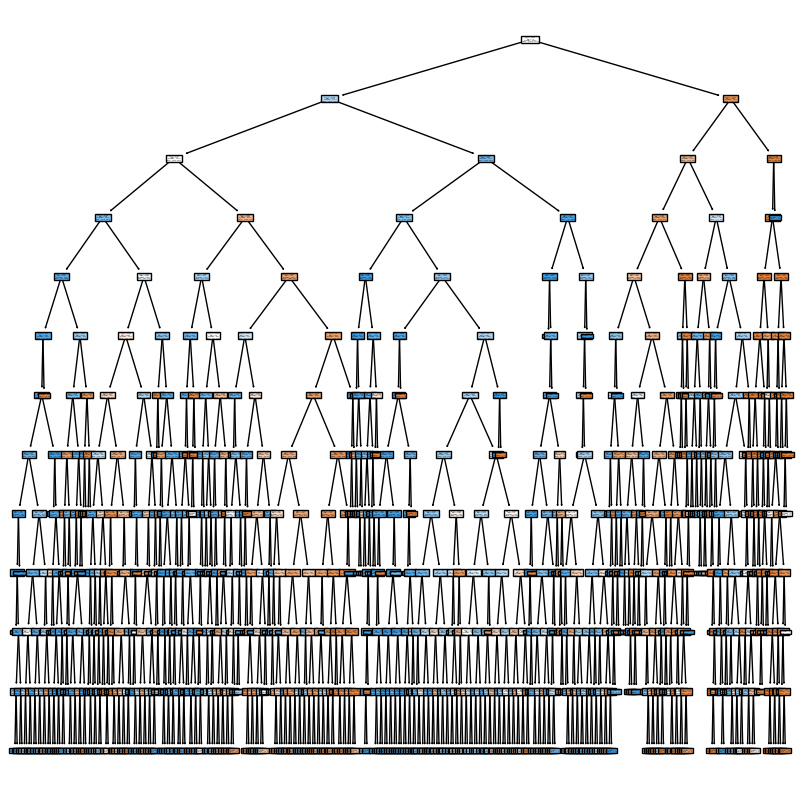

In [68]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(dt2,filled=True)
plt.show()

In [69]:
#rfc,feature selection,oversampling,gives the highest accuracy

### Conclusion

Hyper parameter tuning with randomforest classfier and decisiontree classifier doesnt gave a better accuracy to this dataset.so we conclude that,the model randomforest classifier with feature selection and oversampling gives the best accuracy to the dataset.

### Best Model

Random Forest Classifier is an ensemble model which uses the bagging technique,

In [70]:
rf_os1=RandomForestClassifier(random_state=1)
rf_os1.fit(X1_train_os,y1_train_os)
y_pred_rf=rf_os1.predict(X1_test_os)
print(accuracy_score(y1_test_os,y_pred_rf))

0.8950871011939714


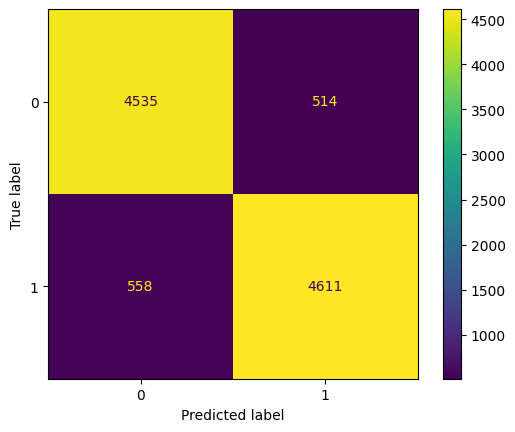

In [71]:
print(ConfusionMatrixDisplay.from_predictions(y_pred_rf,y1_test_os))

### Predicting a new value

In [72]:
y_new=rf_os1.predict(scaler.transform([[2017,0,0,2,1,0,224,3,0,0,65,0]]))
y_new

array([1])

## Web Creation

In [73]:
import joblib
#saving the model created,
joblib.dump(rf_os1,'model.project')

['model.project']

In [74]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00


In [75]:
!pip install streamlit

In [76]:
%%writefile app.py
import streamlit as st
import joblib
#load the saved model
model=joblib.load('model.project')
#creating simple input
st.title('hotel reservation prediction')
arrival_year=st.slider('arrival year',2017,2018)
no_of_children=st.slider('no of children',0,10)
car_parking=st.slider('car parking',0,1)
no_of_weeknights=st.slider('weeknights',0,18)
no_of_weekendnights=st.slider('weekend nights',0,8)
room_type=st.slider('room type',0,7)
lead_time=st.slider('lead time',0,444)
market_segment=st.slider('market segment',0,4)
repeated_guest=st.slider('repeated guest',0,2)
previous_booking_not_cancelled=st.slider('previous booking not cancelled',0,60)
avg_price_per_room=st.slider('avg price per room',0,550,)
special_requests=st.slider('no of special request',0,5)
#make predictions
input=[[arrival_year,no_of_children,car_parking,no_of_weeknights,no_of_weekendnights,
        room_type,lead_time,market_segment,repeated_guest,previous_booking_not_cancelled,
        avg_price_per_room,special_requests]]
model=joblib.load('model.project')
if st.button('Predict'):
   pred=model.predict(input)
   st.write(f'Prediction:{pred}')

Writing app.py


In [77]:
!wget -q -O - ipv4.icanhazip.com

34.171.177.55


In [ ]:
!streamlit run app.py&npx localtunnel --port 8501



npx: installed 22 in 4.433s
your url is: https://thick-lies-walk.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.171.177.55:8501

